# ARIMA and Seasonal ARIMA

### Autoregressive Integrated Moving Averages

# Libraries

In [1]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
plt.style.use('fivethirtyeight')


import sys
sys.path.append('../')

from Functions import arima

In [2]:
dataTrain = pd.read_csv('../01-Data/train.csv', parse_dates=['date'], index_col='date')

In [14]:
dataTrain.head()

,store,item,sales
date,,,
2013-01-01,1,1,13
2013-01-02,1,1,11
2013-01-03,1,1,14
2013-01-04,1,1,13
2013-01-05,1,1,10


In [ ]:
# Massing Values

In [4]:
dataTrain.isnull().any()

store    False
item     False
sales    False
dtype: bool

In [5]:
dataTrain.describe().T

,count,mean,std,min,25%,50%,75%,max
store,913000.0,5.500000,2.872283,1.0,3.0,5.5,8.0,10.0
item,913000.0,25.500000,14.430878,1.0,13.0,25.5,38.0,50.0
sales,913000.0,52.250287,28.801144,0.0,30.0,47.0,70.0,231.0


In [6]:
stores = pd.DataFrame(dataTrain.groupby(['date','store']).sum()['sales']).unstack()
stores = stores.resample('W',label='left').sum()
stores.sort_index(inplace = True)

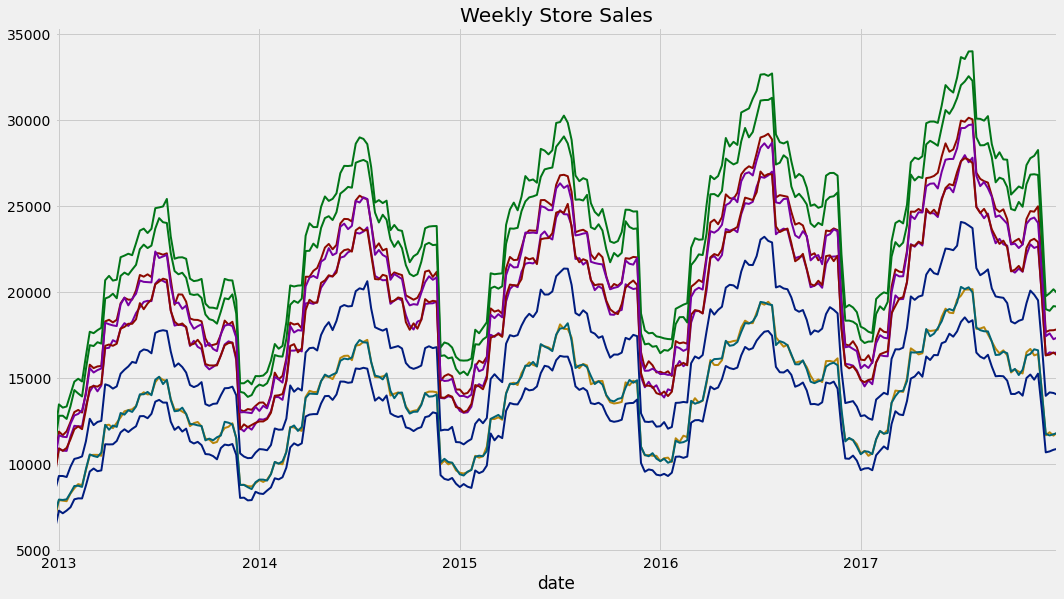

In [7]:
with plt.style.context('seaborn-dark-palette'):
    stores.plot(figsize=(16,9), title='Weekly Store Sales', legend=None, linewidth=2)
    plt.show()

In [8]:
stores = pd.DataFrame(dataTrain.groupby(['date','store']).sum()['sales']).unstack()
stores = stores.resample('M',label='left').sum()
stores.sort_index(inplace = True)

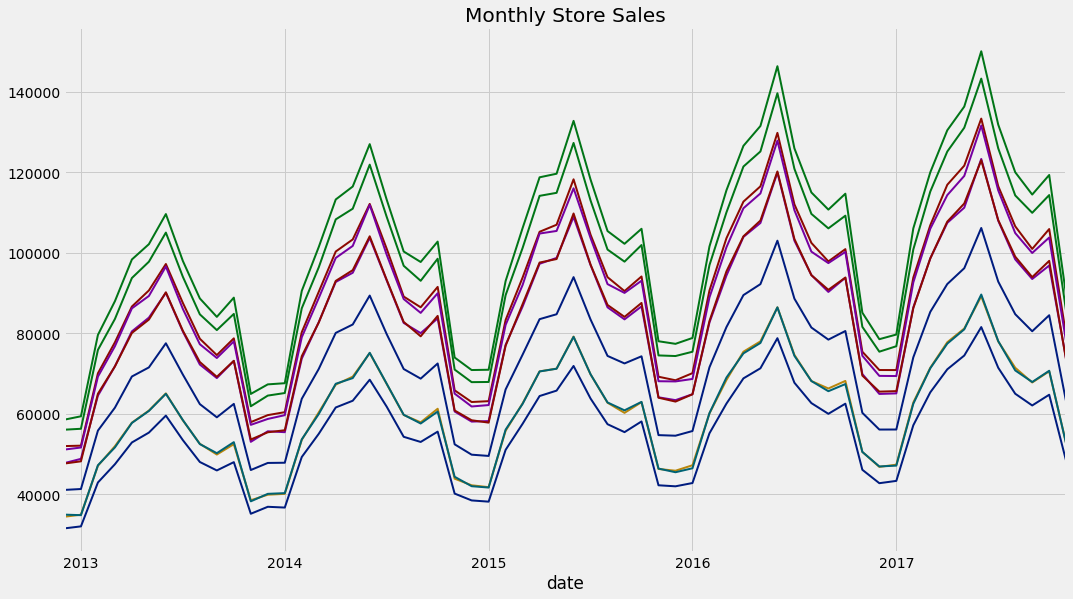

In [9]:
with plt.style.context('seaborn-dark-palette'):
    stores.plot(figsize=(16,9), title='Monthly Store Sales', legend=None, linewidth=2)
    plt.show()

In [10]:
stores.iloc[:, 1].head()

date
2012-12-31    58520
2013-01-31    59384
2013-02-28    79609
2013-03-31    87987
2013-04-30    98361
Freq: M, Name: (sales, 2), dtype: int64

In [11]:
arima.adfuller_test(stores.iloc[:, 1].head())

ADF Test Statistic : -0.049350123434242305
p-value : 0.9542555527755135
#Lags Used : 0
Number of Observations Used : 4
weak evidence against null hypothesis, time series has a unit root, indicating it is non-stationary 


In [12]:
arima.adfuller_test.__doc__

'\n\tReturn the evidence against the null hypothesis(Ho) for analysis of the stacinonary of the series using the p-value\n\t\n\tParamaters\n\t----------\n\tsales (Pandas Series): \n\t\n\tReturns\n\t-------\n\tText (Print)\n\t'

In [13]:
print(arima.adfuller_test.__doc__)


	Return the evidence against the null hypothesis(Ho) for analysis of the stacinonary of the series using the p-value
	
	Paramaters
	----------
	sales (Pandas Series): 
	
	Returns
	-------
	Text (Print)
	
